In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
from IPython.display import HTML, display

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.sandbox.regression.predstd import wls_prediction_std

sns.set_style("darkgrid")

In [3]:
# import warnings filter
from warnings import simplefilter

# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [120]:
opioids = pd.read_csv('opioids.csv')
overdoses = pd.read_csv('overdoses.csv', thousands = ',')
prescriber = pd.read_csv('prescriber_cap.csv')

In [121]:
overdoses= overdoses[['Abbrev', 'Population', 'Deaths']]

In [122]:
#Merge Overdoses DF on Prescriber DF
prescriber = pd.merge(prescriber, overdoses, on=['Abbrev'], how='outer')

## Linear Regression - Statistical

In [610]:
presc_up = prescriber[['TotPresc', 'Population', 'Gender', 'Region', 'Spec_group']]
presc_up

,TotPresc,Population,Gender,Region,Spec_group
0,29,26448193,M,South,group1
1,144,26448193,M,South,group1
2,17,26448193,M,South,group1
3,734,26448193,F,South,group1
4,1222,26448193,M,South,group1
...,...,...,...,...,...
24754,223,844877,M,Central,group1
24755,1322,844877,F,Central,group1
24756,1191,844877,M,Central,group1
24757,24,844877,F,Central,group1


In [615]:
fit_spec = ols('TotPresc ~ C(Spec_group)', data=presc_up).fit()

fit_spec_summary = fit_spec.summary()

HTML(
(fit_spec_summary
    .as_html()
    .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#aec7e8;"> Adj. R-squared: </th>')
    .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')
    .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')
    .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')
    .replace('<th>[0.025</th>    <th>0.975]</th>', '<th style="background-color:#ff9896;">[0.025</th>    <th style="background-color:#ff9896;">0.975]</th>'))
)

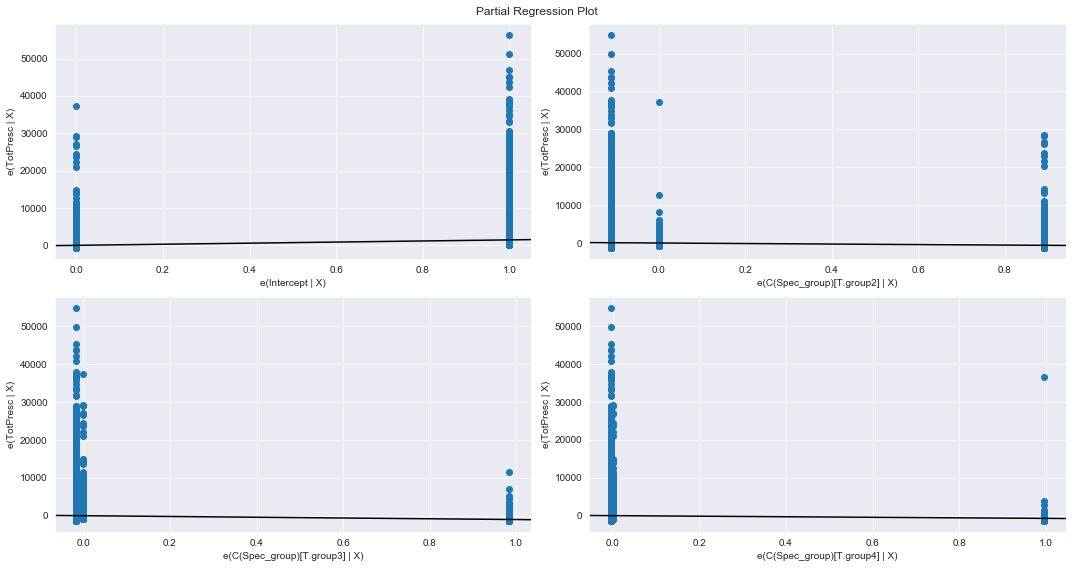

In [635]:
fig = plt.figure(figsize=(15,8))

fig = sm.graphics.plot_partregress_grid(fit_spec, fig=fig)

In [616]:
presc_spec_gender = ols('TotPresc ~ C(Spec_group) + C(Gender)', data= presc_up).fit()

presc_spec_gender_summary = presc_spec_gender.summary()

HTML(
(presc_spec_gender_summary
    .as_html()
    .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#aec7e8;"> Adj. R-squared: </th>')
    .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')
    .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')
    .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')
    .replace('<th>[0.025</th>    <th>0.975]</th>', '<th style="background-color:#ff9896;">[0.025</th>    <th style="background-color:#ff9896;">0.975]</th>'))
)

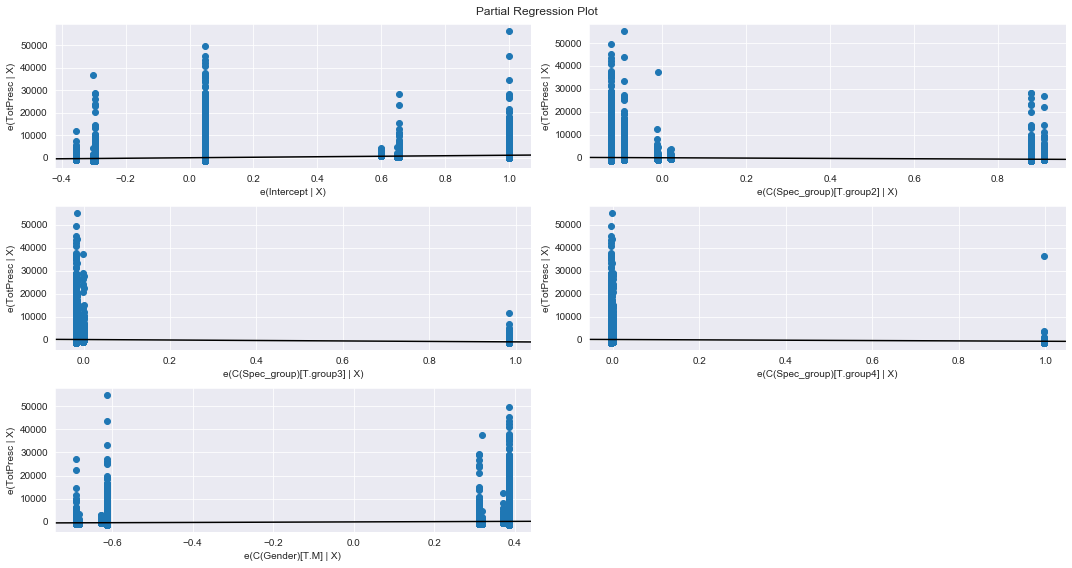

In [620]:
fig = plt.figure(figsize=(15,8))

fig = sm.graphics.plot_partregress_grid(presc_spec_gender, fig=fig)

In [617]:
presc_spec_gender_region = ols('TotPresc ~ C(Spec_group) + C(Gender) + C(Region)', data= presc_up).fit()

presc_spec_gender_region_summary = presc_spec_gender_region.summary()

HTML(
(presc_spec_gender_region_summary
    .as_html()
    .replace('<th>  Adj. R-squared:    </th>', '<th style="background-color:#aec7e8;"> Adj. R-squared: </th>')
    .replace('<th>coef</th>', '<th style="background-color:#ffbb78;">coef</th>')
    .replace('<th>std err</th>', '<th style="background-color:#c7e9c0;">std err</th>')
    .replace('<th>P>|t|</th>', '<th style="background-color:#bcbddc;">P>|t|</th>')
    .replace('<th>[0.025</th>    <th>0.975]</th>', '<th style="background-color:#ff9896;">[0.025</th>    <th style="background-color:#ff9896;">0.975]</th>'))
)

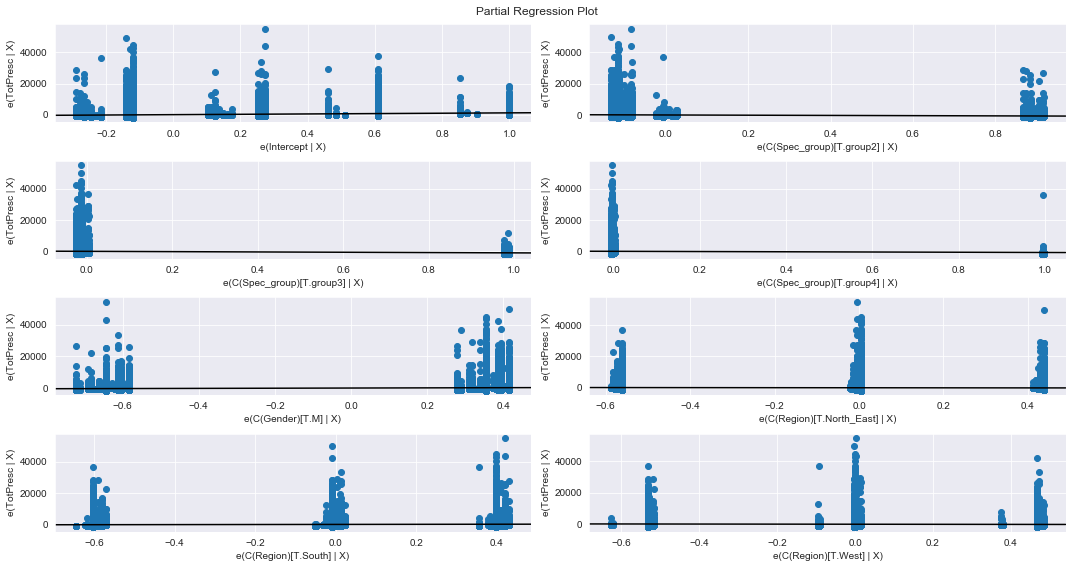

In [619]:
fig = plt.figure(figsize=(15,8))

fig = sm.graphics.plot_partregress_grid(presc_spec_gender_region, fig=fig)

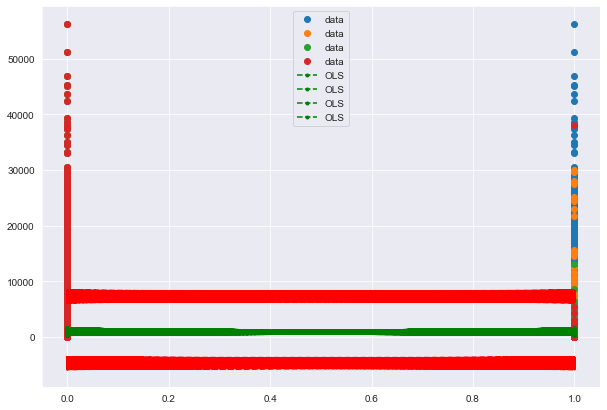

In [636]:
# predictor variable (x) and dependent variable (y)
x = pd.get_dummies(presc_up[['Spec_group']])
y = presc_up[['TotPresc']]

# Retrieve our confidence interval values
# _ is a dummy variable since we don't actually use it for plotting but need it as a placeholder
# since wls_prediction_std(housing_model) returns 3 values
_, confidence_interval_lower, confidence_interval_upper = wls_prediction_std(housing_model)

fig, ax = plt.subplots(figsize=(10,7))

# plot the dots
# 'o' specifies the shape (circle), we can also use 'd' (diamonds), 's' (squares)
ax.plot(x, y, 'o', label="data")

# plot the trend line
# g-- and r-- specify the color to use
ax.plot(x, fit1.fittedvalues, 'g--.', label="OLS")

# plot upper and lower ci values
ax.plot(x, confidence_interval_upper, 'r--')
ax.plot(x, confidence_interval_lower, 'r--')

# plot legend
ax.legend(loc='best');

## Linear Regression - ML

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [602]:
X1 = prescriber[['Gender', 'Spec_group', 'Region', 'Population']]
y1 = prescriber['TotPresc']

In [603]:
X1 = pd.get_dummies(X1, drop_first=True)

X1

,Population,Gender_M,Spec_group_group2,Spec_group_group3,Spec_group_group4,Region_North_East,Region_South,Region_West
0,26448193,1,0,0,0,0,1,0
1,26448193,1,0,0,0,0,1,0
2,26448193,1,0,0,0,0,1,0
3,26448193,0,0,0,0,0,1,0
4,26448193,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
24754,844877,1,0,0,0,0,0,0
24755,844877,0,0,0,0,0,0,0
24756,844877,1,0,0,0,0,0,0
24757,844877,0,0,0,0,0,0,0


In [593]:
#train_test_split(X, y, test_size=0.4, random_state=101
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1, y1, test_size = 0.4, random_state = 101)
regr = linear_model.LinearRegression() # Do not use fit_intercept = False if you have removed 1 column after dummy encoding
regr.fit(X_train1, Y_train1)
predicted = regr.predict(X_test1)

In [594]:
lm1 = LinearRegression()
lm1.fit(X_train1,Y_train1)

predictions = lm1.predict(X_test1)

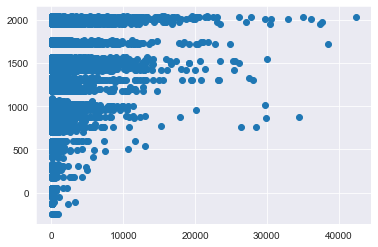

In [595]:
plt.scatter(Y_test1, predictions)

In [516]:
presc_ub_dummie = pd.get_dummies(presc_up, columns=['Spec_group', 'Region', 'Gender'], drop_first=True)
presc_ub_dummie

,TotPresc,Spec_group_group2,Spec_group_group3,Spec_group_group4,Region_North East,Region_South,Region_West,Gender_M
0,29,0,0,0,0,1,0,1
1,144,0,0,0,0,1,0,1
2,17,0,0,0,0,1,0,1
3,734,0,0,0,0,1,0,0
4,1222,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...
24754,223,0,0,0,0,0,0,1
24755,1322,0,0,0,0,0,0,0
24756,1191,0,0,0,0,0,0,1
24757,24,0,0,0,0,0,0,0


In [517]:
presc_ub_dummie.describe()

,TotPresc,Spec_group_group2,Spec_group_group3,Spec_group_group4,Region_North East,Region_South,Region_West,Gender_M
count,24759.000000,24759.000000,24759.000000,24759.000000,24759.000000,24759.000000,24759.000000,24759.000000
mean,1371.205865,0.107880,0.014136,0.003554,0.267539,0.297144,0.231431,0.621834
std,3097.612693,0.310235,0.118055,0.059513,0.442685,0.457010,0.421756,0.484939
min,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,193.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1143.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,56280.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


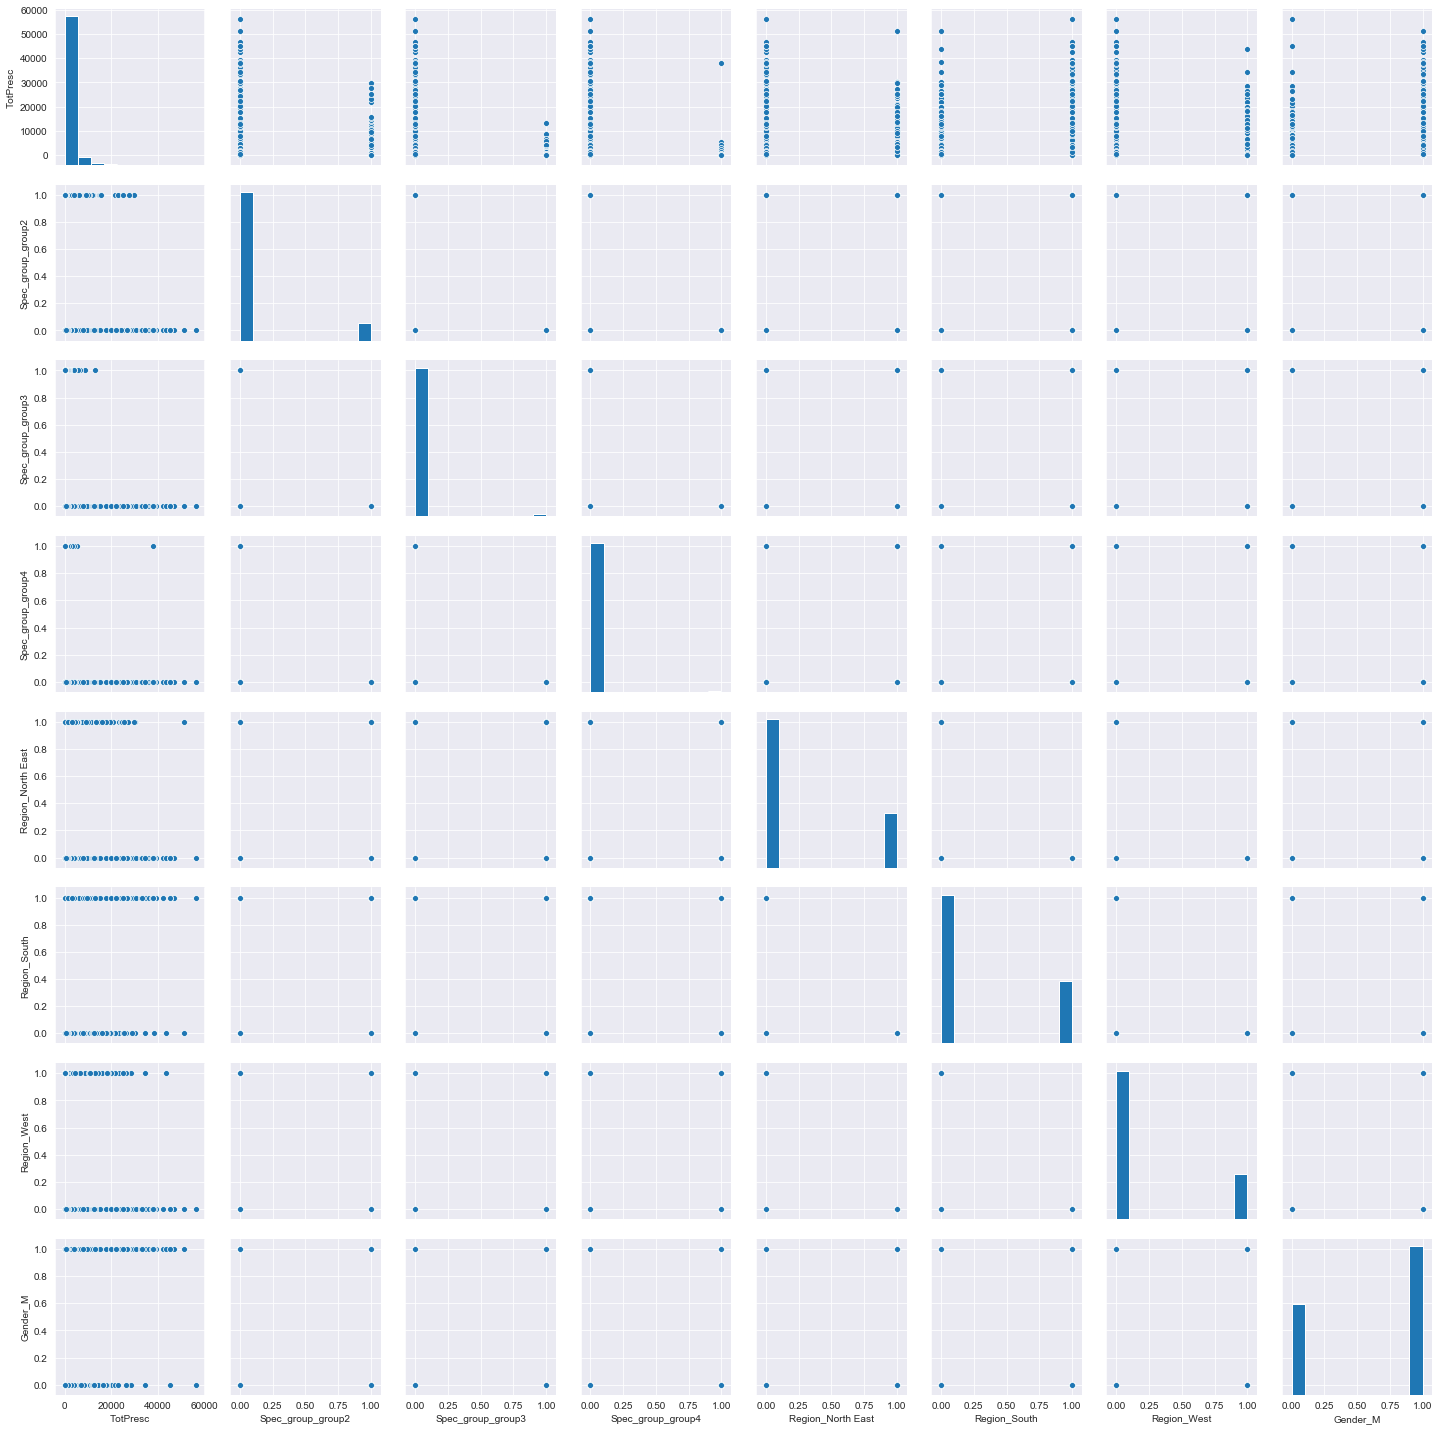

In [637]:
sns.pairplot(presc_ub_dummie)

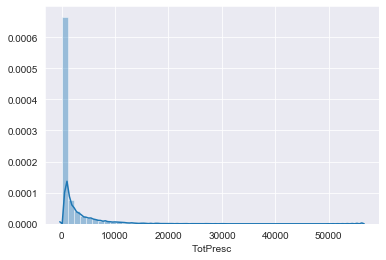

In [518]:
sns.distplot(presc_ub_dummie['TotPresc'])

In [520]:
presc_ub_dummie.corr()

,TotPresc,Spec_group_group2,Spec_group_group3,Spec_group_group4,Region_North East,Region_South,Region_West,Gender_M
TotPresc,1.000000,-0.065966,-0.035586,-0.012094,-0.038835,0.073887,-0.042821,0.084406
Spec_group_group2,-0.065966,1.000000,-0.041641,-0.020769,0.020412,-0.009878,-0.016717,0.047810
Spec_group_group3,-0.035586,-0.041641,1.000000,-0.007152,-0.011314,-0.010481,0.038938,0.001664
Spec_group_group4,-0.012094,-0.020769,-0.007152,1.000000,-0.008499,0.001264,0.017112,0.007388
Region_North East,-0.038835,0.020412,-0.011314,-0.008499,1.000000,-0.392963,-0.331643,-0.035190
Region_South,0.073887,-0.009878,-0.010481,0.001264,-0.392963,1.000000,-0.356796,0.041583
Region_West,-0.042821,-0.016717,0.038938,0.017112,-0.331643,-0.356796,1.000000,-0.000417
Gender_M,0.084406,0.047810,0.001664,0.007388,-0.035190,0.041583,-0.000417,1.000000


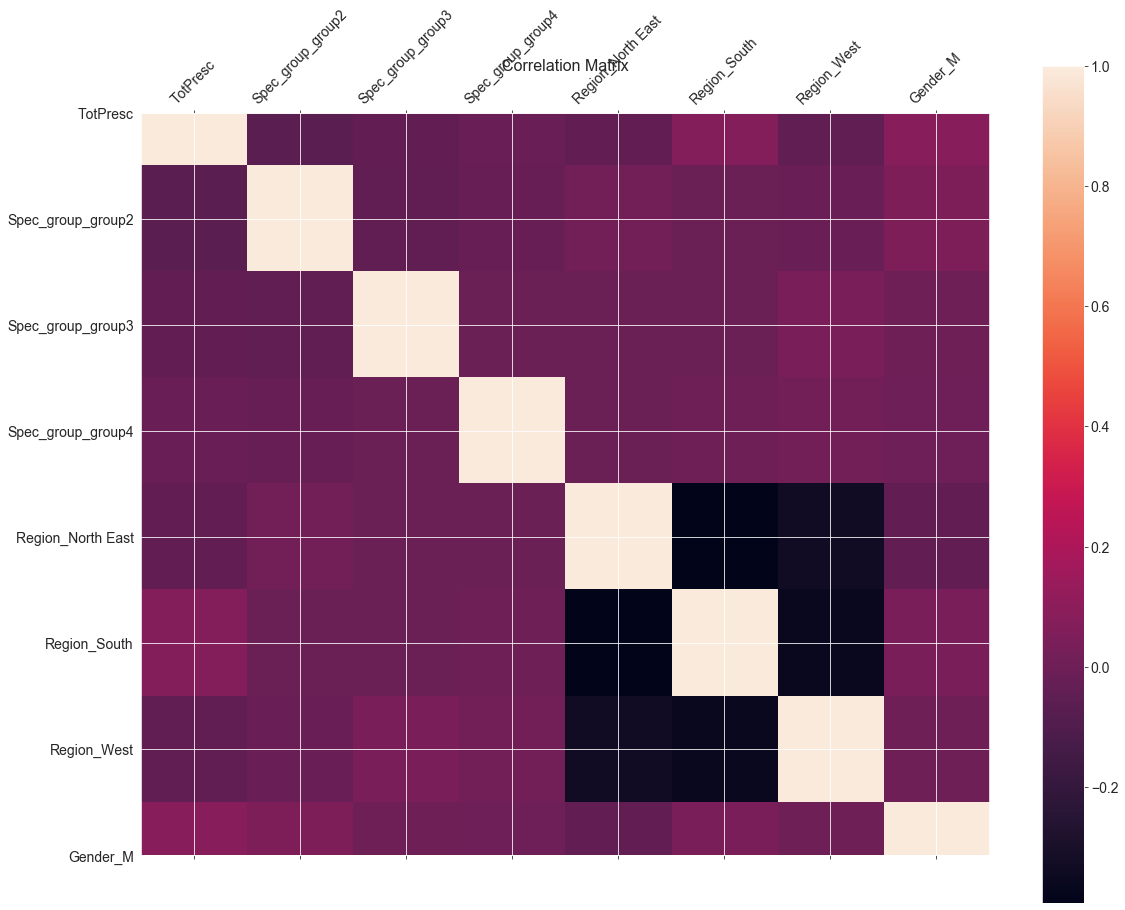

In [521]:
f = plt.figure(figsize=(19, 15))
plt.matshow(presc_ub_dummie.corr(), fignum=f.number)
plt.xticks(range(presc_ub_dummie.shape[1]), presc_ub_dummie.columns, fontsize=14, rotation=45)
plt.yticks(range(presc_ub_dummie.shape[1]), presc_ub_dummie.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);